In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

from zipfile import ZipFile


import torch
import torchaudio
from torch.utils.data import Dataset, DataLoader
from transformers import Wav2Vec2Model, Wav2Vec2Processor, Trainer, TrainingArguments, Wav2Vec2ForSequenceClassification

In [4]:
# Unzip the downloaded dataset
with ZipFile("/content/drive/MyDrive/BC.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/BC'):
    for filename in filenames:
        # Add the full path
        full_path = os.path.join(dirname, filename)
        paths.append(full_path)

        # Extract the label from the folder structure
        label = os.path.basename(os.path.dirname(dirname))  # Folder name is the label
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [6]:
len(paths)

18580

In [7]:
paths[:5]

['/content/BC/Female/01 Dipa-20250119T114948Z-001/01 Dipa/Neutral/BC/BC_F_01_Dipa_Neutral_S7_(4).wav',
 '/content/BC/Female/01 Dipa-20250119T114948Z-001/01 Dipa/Neutral/BC/BC_F_01_Dipa_Neutral_S10_(1).wav',
 '/content/BC/Female/01 Dipa-20250119T114948Z-001/01 Dipa/Neutral/BC/BC_F_01_Dipa_Neutral_S9_(4).wav',
 '/content/BC/Female/01 Dipa-20250119T114948Z-001/01 Dipa/Neutral/BC/BC_F_01_Dipa_Neutral_S6_(5).wav',
 '/content/BC/Female/01 Dipa-20250119T114948Z-001/01 Dipa/Neutral/BC/BC_F_01_Dipa_Neutral_S9_(3).wav']

In [8]:
labels[:5]

['neutral', 'neutral', 'neutral', 'neutral', 'neutral']

In [9]:
## Create a dataframe
df = pd.DataFrame()
df['audio_paths'] = paths
df['labels'] = labels
df.head()

audio_paths   labels
0  /content/BC/Female/01 Dipa-20250119T114948Z-00...  neutral
1  /content/BC/Female/01 Dipa-20250119T114948Z-00...  neutral
2  /content/BC/Female/01 Dipa-20250119T114948Z-00...  neutral
3  /content/BC/Female/01 Dipa-20250119T114948Z-00...  neutral
4  /content/BC/Female/01 Dipa-20250119T114948Z-00...  neutral

In [10]:
df['labels'] = df['labels'].replace({'surpise': 'surprise', 'clam': 'calm'})
df['labels'] = df['labels'].str.lower()  # Convert to lowercase for consistency
df['labels'].value_counts()

labels
sad         2328
disgust     2327
surprise    2326
neutral     2320
fear        2320
happy       2320
calm        2320
angry       2319
Name: count, dtype: int64

<Axes: xlabel='labels', ylabel='count'>

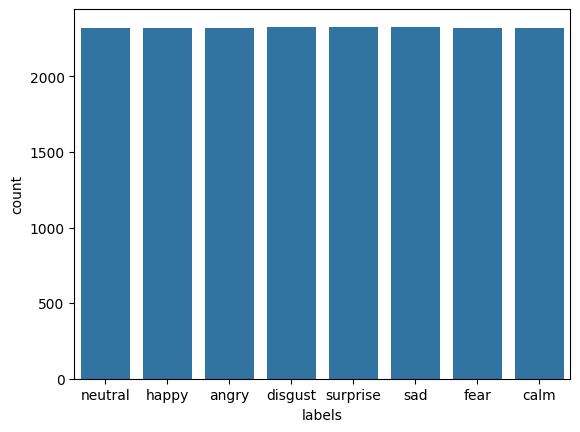

In [11]:
sns.countplot(data=df, x='labels')

In [12]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [13]:
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

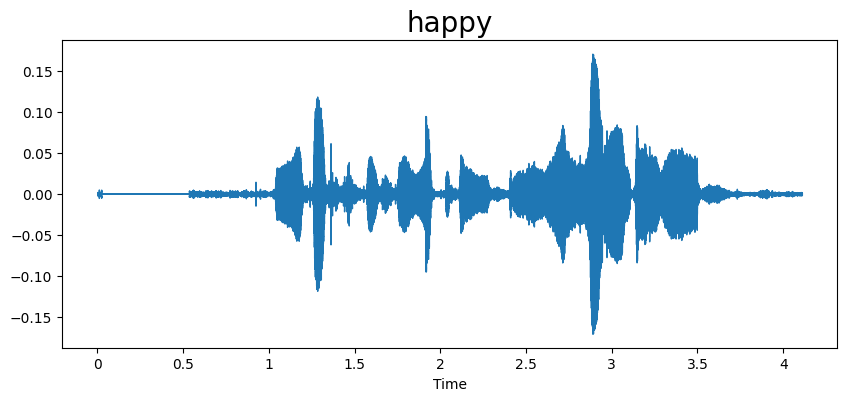

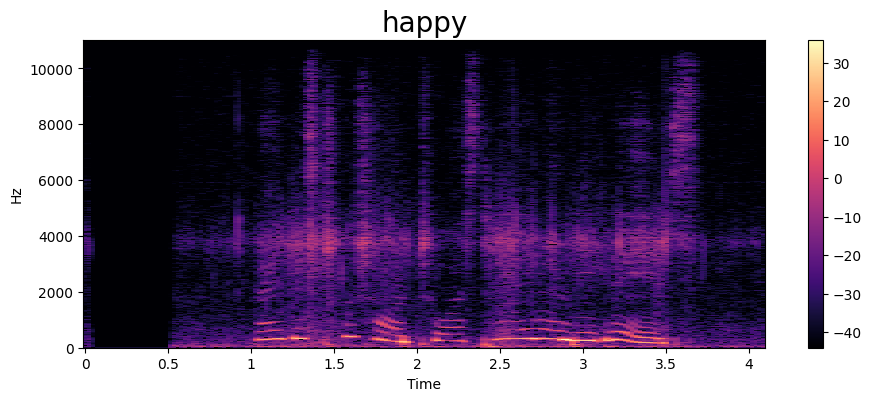

In [14]:
emotion = 'happy'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

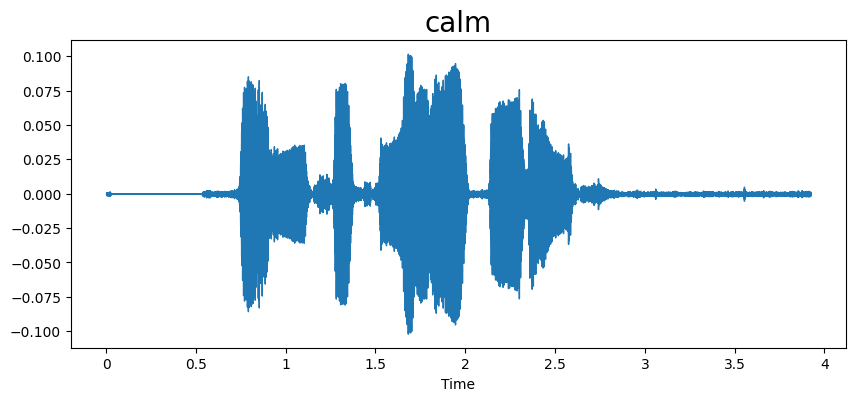

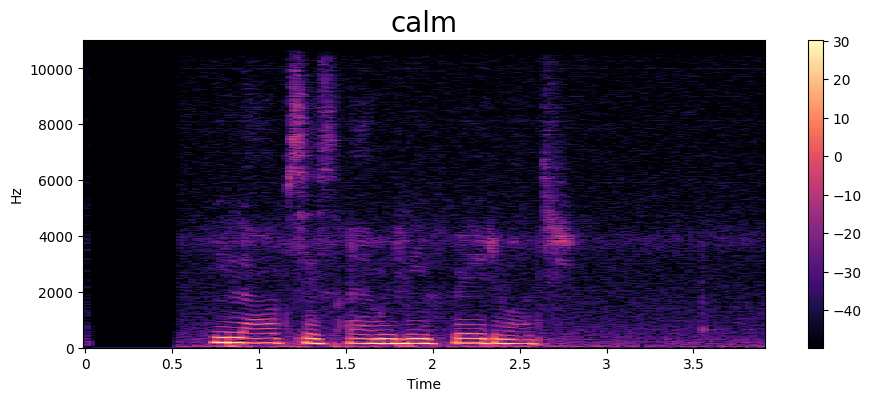

In [15]:
emotion = 'calm'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

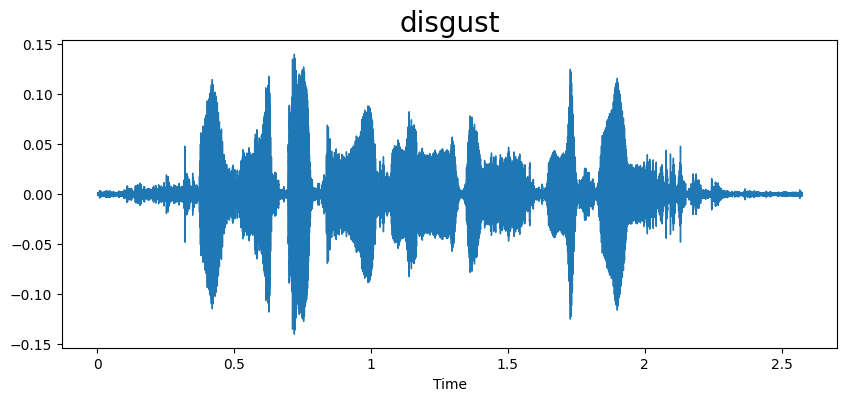

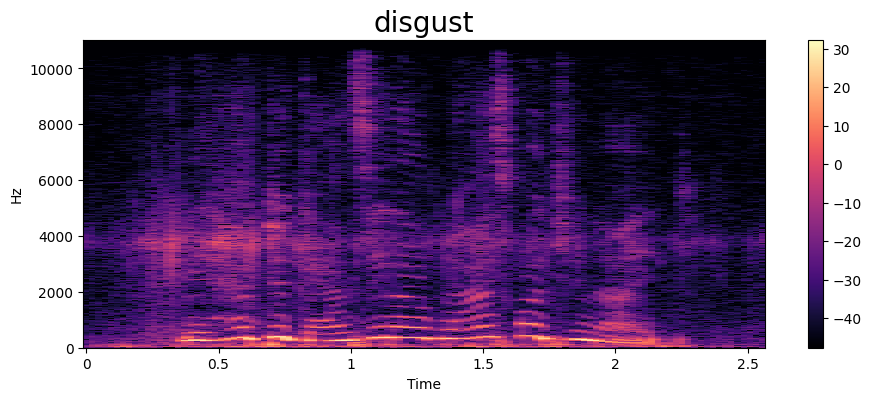

In [16]:
emotion = 'disgust'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

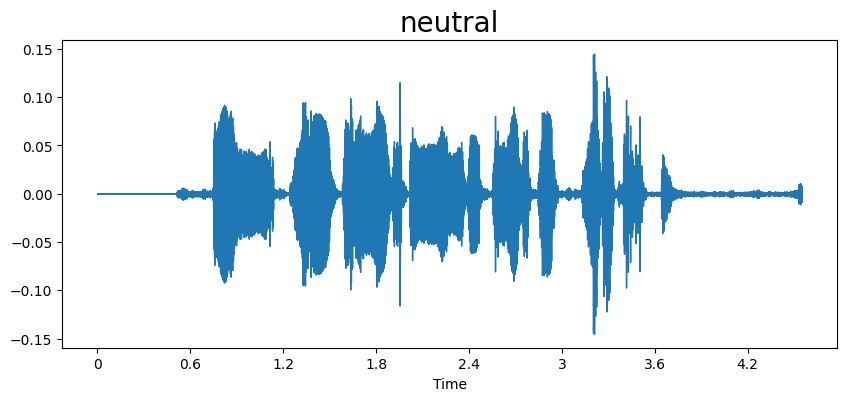

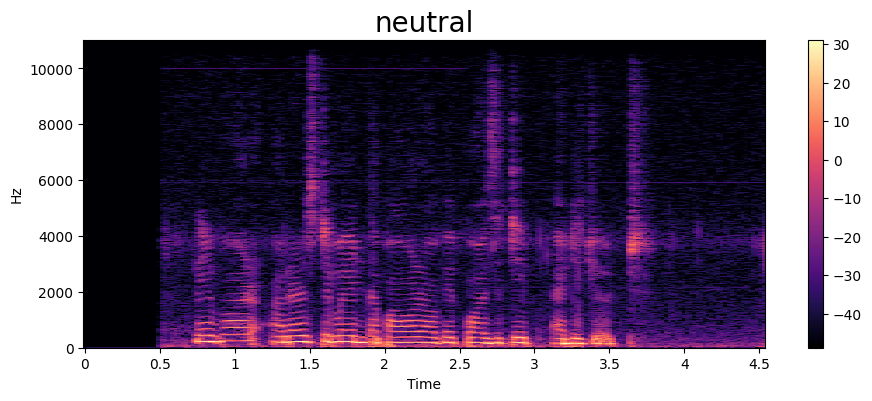

In [17]:
emotion = 'neutral'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

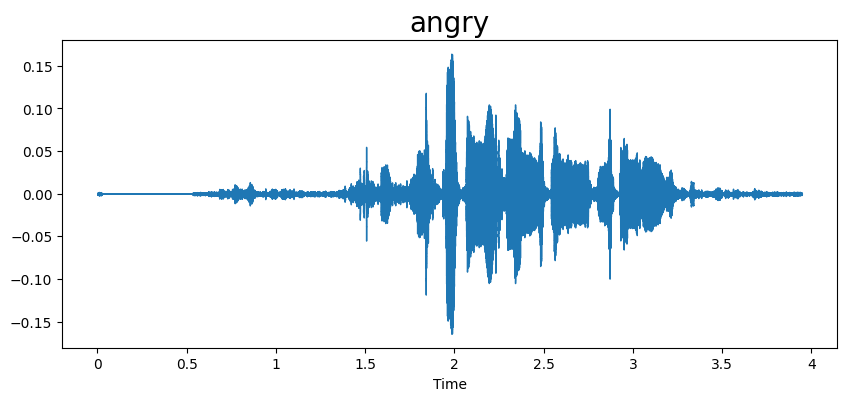

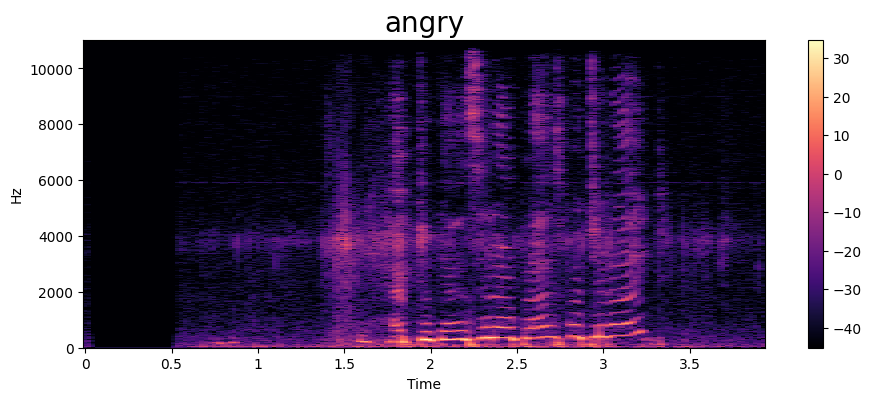

In [18]:
emotion = 'angry'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

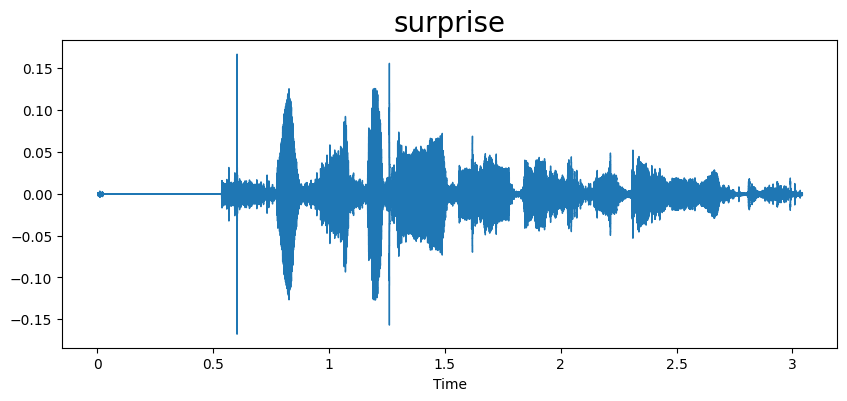

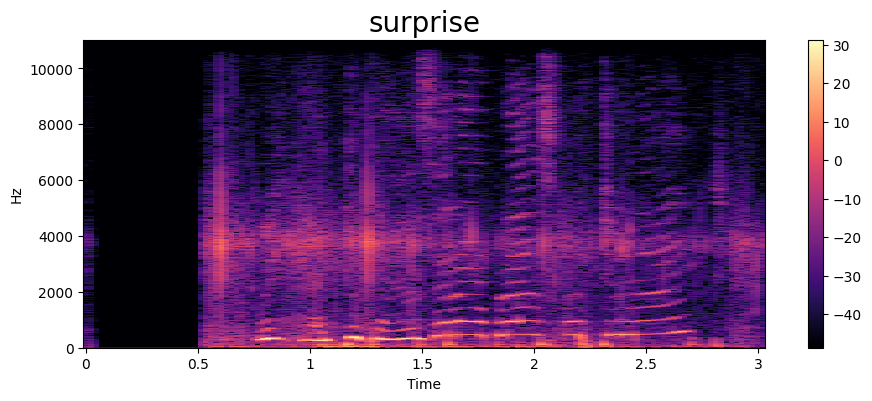

In [19]:
emotion = 'surprise'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

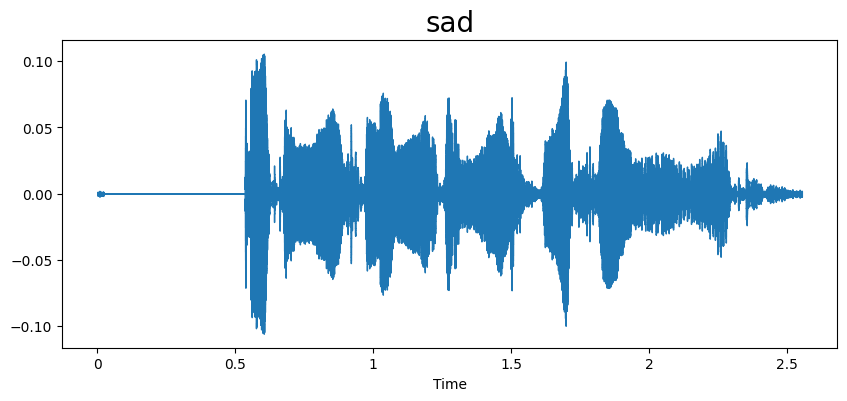

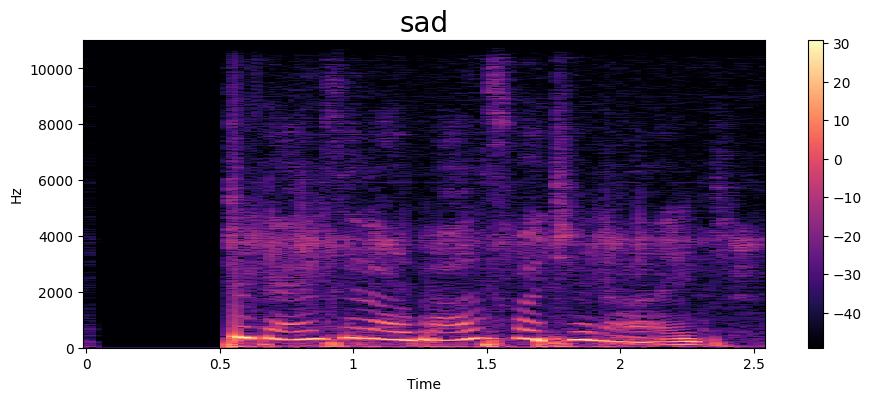

In [20]:
emotion = 'sad'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

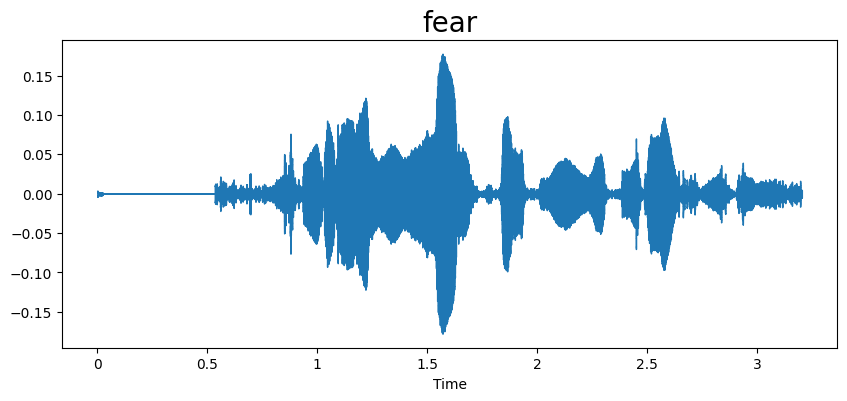

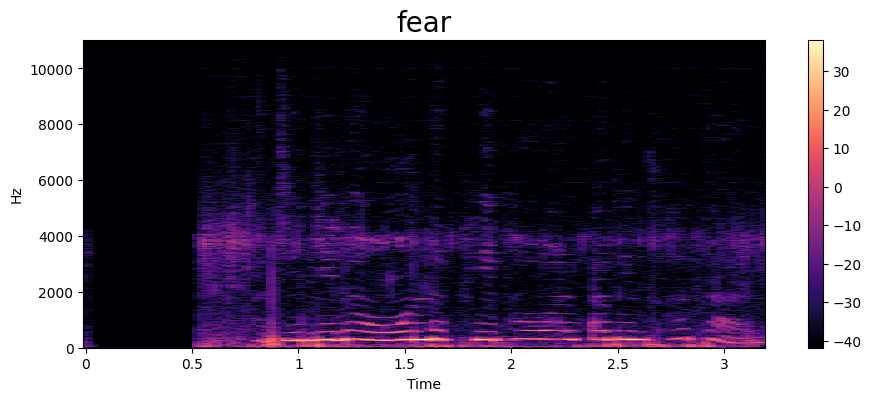

In [21]:
emotion = 'fear'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [22]:
# convert labels to integers

label_map = {label: idx for idx, label in enumerate(df['labels'].unique()) }
inverse_label_map = {idx: label for label, idx in label_map.items()}
df['labels'] = df['labels'].map(label_map)
df.head(2)

audio_paths  labels
0  /content/BC/Female/01 Dipa-20250119T114948Z-00...       0
1  /content/BC/Female/01 Dipa-20250119T114948Z-00...       0

In [23]:
from soundfile import LibsndfileError  # Import the exception

In [24]:
!pip install ffmpeg gstreamer-1.0 libav-tools

  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement gstreamer-1.0 (from versions: none)
ERROR: No matching distribution found for gstreamer-1.0


In [25]:
from soundfile import LibsndfileError  # Import the exception
import librosa

class SpeechEmotionDataset(Dataset):
    def __init__(self, df, processor, label_map, max_length=32000):
        self.df = df
        self.processor = processor
        self.label_map = label_map  # Ensure label_map is passed to the dataset
        self.max_length = max_length
        self.valid_files = self.find_valid_files()

    def find_valid_files(self):
        """Filters out files that cannot be loaded by librosa."""
        valid_files = []
        for index in range(len(self.df)):
            audio_path = self.df.iloc[index]['audio_paths']
            try:
                # Attempt to load the audio file using librosa
                librosa.load(audio_path, sr=16000)
                valid_files.append(index)
            except Exception as e:
                print(f"Skipping file: {audio_path} due to error: {e}")
        return valid_files


    def __len__(self):
        return len(self.valid_files)  # Now returns the count of valid files

    def __getitem__(self, idx):
        # Get the original index of the valid file
        original_index = self.valid_files[idx]

        # Get the audio file path and label for this valid file
        audio_path = self.df.iloc[original_index]['audio_paths']
        label = self.df.iloc[original_index]['labels']


        # Load the audio file (Librosa)
        speech, sr = librosa.load(audio_path, sr=16000)

        # Truncate or pad the audio to match max_length
        if len(speech) > self.max_length:
            speech = speech[:self.max_length]
        else:
            speech = np.pad(speech, (0, self.max_length - len(speech)), 'constant')

        # Preprocess the audio using the processor (e.g., Wav2Vec2Processor)
        inputs = self.processor(
            speech,
            sampling_rate=16000,
            return_tensors='pt',
            padding=True,
            truncation=True,
            max_length=self.max_length
        )

        # Access the input values correctly
        input_values = inputs['input_values'].squeeze()  # Ensure it's the correct format for PyTorch

        # Return a dictionary with input values and labels as tensors
        return {'input_values': input_values, 'labels': torch.tensor(label, dtype=torch.long)}

In [26]:
#split the data for train and test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
# initailize the data for train and test
processor =  Wav2Vec2Processor.from_pretrained('facebook/Wav2Vec2-base')
model = Wav2Vec2ForSequenceClassification.from_pretrained('facebook/Wav2Vec2-base', num_labels=8)

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/Wav2Vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
# Reinitialize your datasets
train_dataset = SpeechEmotionDataset(train_df, processor, label_map)
test_dataset = SpeechEmotionDataset(test_df, processor, label_map)

In [29]:
# Create DataLoaders with optimized data loading
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

In [30]:
from transformers import Trainer, TrainingArguments


training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=1e-4,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.01,
    fp16=True,
    gradient_accumulation_steps=2,
    logging_dir='./logs',
    save_strategy="epoch",
    report_to=["none"]  # Disable W&B logging
)


In [31]:
# Define metric computation function
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids  # Corrected 'labels_ids' to 'label_ids'
    preds = np.argmax(pred.predictions, axis=1)  # Corrected 'prediction' to 'predictions'
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [32]:
# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)


In [35]:
trainer.train()

TrainOutput(global_step=2320, training_loss=0.46822253177905904, metrics={'train_runtime': 3330.7464, 'train_samples_per_second': 44.627, 'train_steps_per_second': 0.697, 'total_flos': 2.688190641856512e+18, 'train_loss': 0.46822253177905904, 'epoch': 9.959139784946236})

In [36]:
# Calculate training accuracy
train_metrics = trainer.evaluate(train_dataset)
print("Training Accuracy:", train_metrics['eval_accuracy'])

Training Accuracy: 0.9921959095801938


In [37]:
# Calculate test accuracy
test_metrics = trainer.evaluate(test_dataset)
print("Test Accuracy:", test_metrics['eval_accuracy'])

Test Accuracy: 0.9270721205597416


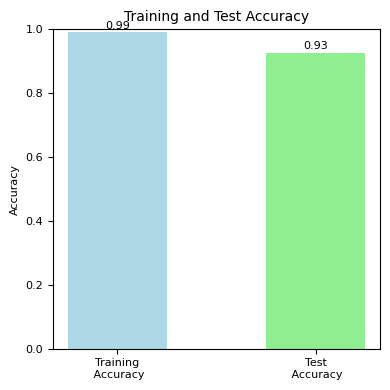

In [38]:
# Collect accuracies
accuracies = [train_metrics['eval_accuracy'], test_metrics['eval_accuracy']]
labels = ['Training\n Accuracy', 'Test\n Accuracy']

# Define bar positions
x_positions = [0, 0.1]  # Reduce the space between the bars by adjusting x-positions

# Plot the bar diagram
plt.figure(figsize=(4, 4))  # Decrease figure width for compactness
bar_width = 0.05  # Adjust the bar width
colors = ['lightblue', 'lightgreen']

plt.bar(x_positions, accuracies, color=colors, width=bar_width)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.ylabel('Accuracy', fontsize=8)
plt.title('Training and Test Accuracy', fontsize=10)

# Add x-axis labels with reduced spacing
plt.xticks(x_positions, labels, fontsize=8)
plt.yticks(fontsize=8)

# Add accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(x_positions[i], acc + 0.01, f'{acc:.2f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

In [39]:
# Get predictions for the test dataset
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

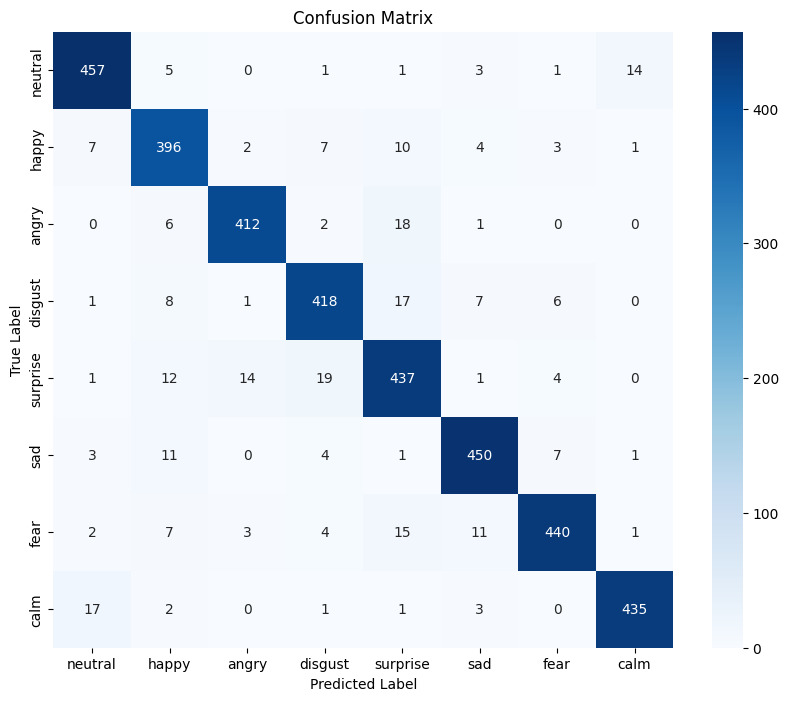

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(true_labels, preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=inverse_label_map.values(), yticklabels=inverse_label_map.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

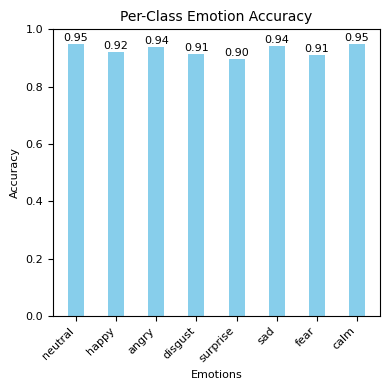

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate per-class accuracy
class_accuracies = cm.diagonal() / cm.sum(axis=1)  # True positives / Total samples per class

# Get class names from the inverse label map
emotion_classes = [inverse_label_map[i] for i in range(len(inverse_label_map))]

# Plot the bar diagram with smaller bar width
plt.figure(figsize=(4, 4))
bar_width = 0.4  # Adjust the bar width here
plt.bar(emotion_classes, class_accuracies, color='skyblue', width=bar_width)
plt.xlabel('Emotions', fontsize=8)
plt.ylabel('Accuracy', fontsize=8)
plt.title('Per-Class Emotion Accuracy', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8) # Set smaller font size for x-axis labels
plt.yticks(fontsize=8)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
for i, acc in enumerate(class_accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', fontsize=8)  # Add accuracy values on top of bars
plt.tight_layout()
plt.show()

In [42]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(true_labels, preds, target_names=inverse_label_map.values())
print(report)


              precision    recall  f1-score   support

     neutral       0.94      0.95      0.94       482
       happy       0.89      0.92      0.90       430
       angry       0.95      0.94      0.95       439
     disgust       0.92      0.91      0.91       458
    surprise       0.87      0.90      0.88       488
         sad       0.94      0.94      0.94       477
        fear       0.95      0.91      0.93       483
        calm       0.96      0.95      0.95       459

    accuracy                           0.93      3716
   macro avg       0.93      0.93      0.93      3716
weighted avg       0.93      0.93      0.93      3716



In [43]:
training_logs = trainer.state.log_history

# Separate loss and accuracy for training and validation
train_loss = [log['loss'] for log in training_logs if 'loss' in log]
eval_loss = [log['eval_loss'] for log in training_logs if 'eval_loss' in log]
eval_accuracy = [log['eval_accuracy'] for log in training_logs if 'eval_accuracy' in log]

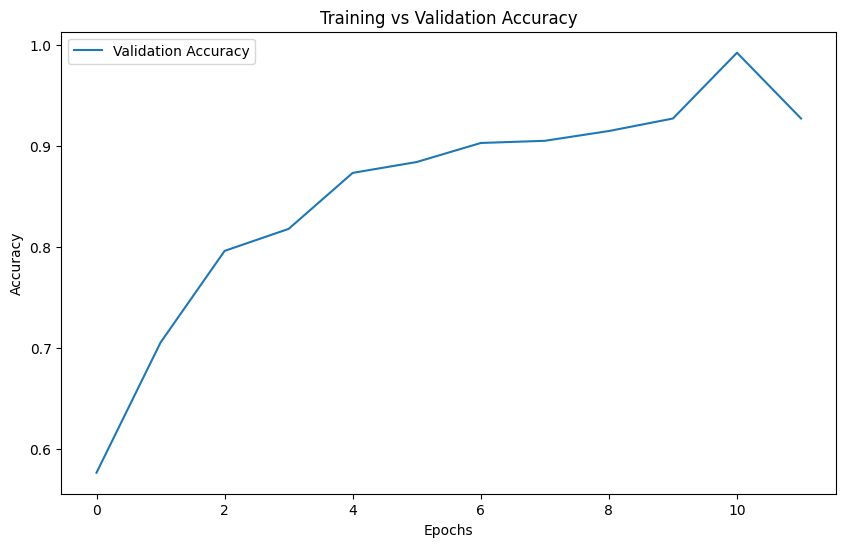

In [44]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(eval_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

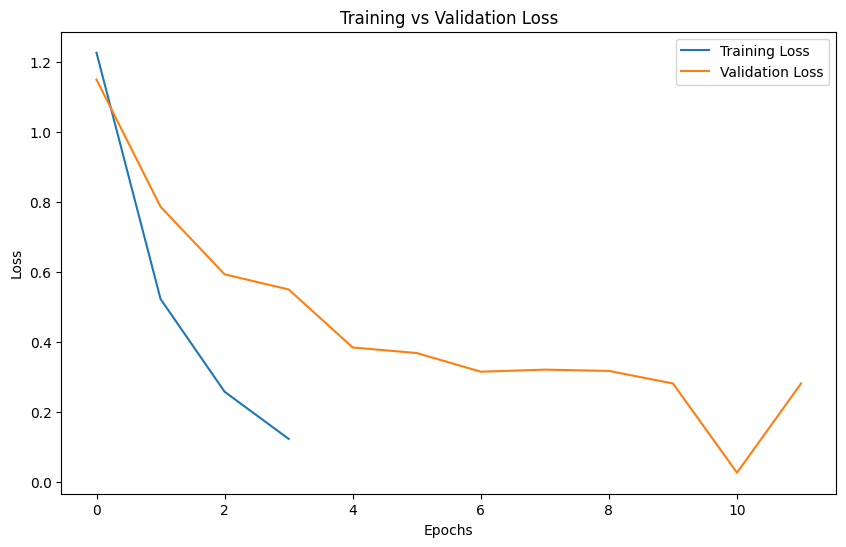

In [45]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(eval_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [46]:
import random
idx = random.randrange(0, len(test_dataset))
print('Orginal Label:', inverse_label_map[int (test_dataset[idx]['labels'])])
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to('cuda')


with torch.no_grad():
    outputs = model(input_values)
logits = outputs.logits
predicted_class = logits.argmax(dim=1).item()

print('Predicted Label :', inverse_label_map[predicted_class])

Orginal Label: angry
Predicted Label : angry


In [47]:
import random
idx = random.randrange(0, len(test_dataset))
print('Orginal Label:', inverse_label_map[int (test_dataset[idx]['labels'])])
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to('cuda')


with torch.no_grad():
    outputs = model(input_values)
logits = outputs.logits
predicted_class = logits.argmax(dim=1).item()

print('Predicted Label :', inverse_label_map[predicted_class])

Orginal Label: calm
Predicted Label : calm


In [48]:
import random
idx = random.randrange(0, len(test_dataset))
print('Orginal Label:', inverse_label_map[int (test_dataset[idx]['labels'])])
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to('cuda')


with torch.no_grad():
    outputs = model(input_values)
logits = outputs.logits
predicted_class = logits.argmax(dim=1).item()

print('Predicted Label :', inverse_label_map[predicted_class])

Orginal Label: disgust
Predicted Label : disgust


In [49]:
import random
idx = random.randrange(0, len(test_dataset))
print('Orginal Label:', inverse_label_map[int (test_dataset[idx]['labels'])])
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to('cuda')


with torch.no_grad():
    outputs = model(input_values)
logits = outputs.logits
predicted_class = logits.argmax(dim=1).item()

print('Predicted Label :', inverse_label_map[predicted_class])

Orginal Label: angry
Predicted Label : angry


In [50]:
import random
idx = random.randrange(0, len(test_dataset))
print('Orginal Label:', inverse_label_map[int (test_dataset[idx]['labels'])])
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to('cuda')


with torch.no_grad():
    outputs = model(input_values)
logits = outputs.logits
predicted_class = logits.argmax(dim=1).item()

print('Predicted Label :', inverse_label_map[predicted_class])

Orginal Label: calm
Predicted Label : calm


In [51]:
import random
idx = random.randrange(0, len(test_dataset))
print('Orginal Label:', inverse_label_map[int (test_dataset[idx]['labels'])])
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to('cuda')


with torch.no_grad():
    outputs = model(input_values)
logits = outputs.logits
predicted_class = logits.argmax(dim=1).item()

print('Predicted Label :', inverse_label_map[predicted_class])

Orginal Label: calm
Predicted Label : calm


In [52]:
import random
idx = random.randrange(0, len(test_dataset))
print('Orginal Label:', inverse_label_map[int (test_dataset[idx]['labels'])])
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to('cuda')


with torch.no_grad():
    outputs = model(input_values)
logits = outputs.logits
predicted_class = logits.argmax(dim=1).item()

print('Predicted Label :', inverse_label_map[predicted_class])

Orginal Label: sad
Predicted Label : sad


In [53]:
import random
idx = random.randrange(0, len(test_dataset))
print('Orginal Label:', inverse_label_map[int (test_dataset[idx]['labels'])])
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to('cuda')


with torch.no_grad():
    outputs = model(input_values)
logits = outputs.logits
predicted_class = logits.argmax(dim=1).item()

print('Predicted Label :', inverse_label_map[predicted_class])

Orginal Label: sad
Predicted Label : sad


In [54]:
import random
idx = random.randrange(0, len(test_dataset))
print('Orginal Label:', inverse_label_map[int (test_dataset[idx]['labels'])])
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to('cuda')


with torch.no_grad():
    outputs = model(input_values)
logits = outputs.logits
predicted_class = logits.argmax(dim=1).item()

print('Predicted Label :', inverse_label_map[predicted_class])

Orginal Label: neutral
Predicted Label : neutral


In [55]:
import random
idx = random.randrange(0, len(test_dataset))
print('Orginal Label:', inverse_label_map[int (test_dataset[idx]['labels'])])
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to('cuda')


with torch.no_grad():
    outputs = model(input_values)
logits = outputs.logits
predicted_class = logits.argmax(dim=1).item()

print('Predicted Label :', inverse_label_map[predicted_class])

Orginal Label: surprise
Predicted Label : surprise
